In [47]:
import pandas as pd
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

# Data prepration

In [48]:
df = pd.read_csv("train.csv")
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [49]:
df.shape

(1000, 12)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [51]:
df.isnull().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [52]:
df.isna().fillna(0)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False


In [53]:
df.dropna(inplace=True)

In [54]:
print(df.columns.tolist())

['v.id', 'on road old', 'on road now', 'years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']


In [55]:
df.columns = df.columns.str.strip()

In [56]:
cols_to_drop = ["v.id",]
df.columns = df.columns.str.strip()
df.drop([col for col in cols_to_drop if col in df.columns], axis=1, inplace=True)

In [57]:
df

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...
995,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,535559,732439,2,140478,4,5,9,184,112,128,74398.0


# input-target split

In [58]:
X = df.drop('current price', axis=1)
y = df['current price']

In [59]:
X

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,535651,798186,3,78945,1,2,14,177,73,123
1,591911,861056,6,117220,5,9,9,148,74,95
2,686990,770762,2,132538,2,8,15,181,53,97
3,573999,722381,4,101065,4,3,11,197,54,116
4,691388,811335,6,61559,3,9,12,160,53,105
...,...,...,...,...,...,...,...,...,...,...
995,633238,743850,5,125092,1,6,11,171,95,97
996,599626,848195,4,83370,2,9,14,161,101,120
997,646344,842733,7,86722,1,8,9,196,113,89
998,535559,732439,2,140478,4,5,9,184,112,128


In [60]:
y

0      351318.0
1      285001.5
2      215386.0
3      244295.5
4      531114.5
         ...   
995    190744.0
996    419748.0
997    405871.0
998     74398.0
999    414938.5
Name: current price, Length: 1000, dtype: float64

# train-test split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
X_test

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
521,693986,727374,3,82191,5,1,9,139,107,99
737,580888,897357,6,57543,1,5,9,172,99,105
740,533346,733566,6,123028,3,7,11,140,103,120
660,507983,761811,3,116587,3,2,14,169,90,124
411,655963,766226,5,50648,3,4,11,140,112,78
...,...,...,...,...,...,...,...,...,...,...
408,655547,798378,5,99194,1,2,9,195,51,118
332,543506,880724,5,120404,5,1,15,169,71,130
208,643744,742863,4,64764,4,10,9,151,99,135
613,675305,845749,5,52086,4,6,15,179,104,124


In [63]:
X_train

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
29,503327,873403,7,101416,3,8,9,171,77,128
535,539063,853655,5,95921,2,9,15,195,101,96
695,647186,834325,3,60666,4,1,9,146,107,125
557,602944,734207,7,117240,4,9,15,148,73,77
836,519091,843455,3,74762,2,5,10,138,76,73
...,...,...,...,...,...,...,...,...,...,...
106,519909,789003,4,66514,3,10,13,139,50,69
270,627918,872779,5,78154,5,6,10,165,100,124
860,630255,768636,2,136449,2,6,15,192,120,136
435,652175,756878,3,96686,5,4,10,190,115,140


#  Normalize the Input Features (StandardScaler)

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build Deep Learning Model

In [65]:
# Define the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression (predicting price)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Add EarlyStopping to stop training if no improvement
early_stop = EarlyStopping(
    monitor='val_loss',      # Monitor validation loss
    patience=20,             # Stop if no improvement for 20 epochs
    restore_best_weights=True  # Use best weights from training
)

# Train the model for 300 epochs
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=400,            # Increased epochs
    batch_size=16,
    callbacks=[early_stop],  # Early stopping added
    verbose=1
)

C:\Users\deepa\second hand Car price prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 110612160512.0000 - mae: 308211.4375 - val_loss: 108029558784.0000 - val_mae: 303624.1250
Epoch 2/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 110432665600.0000 - mae: 307940.9688 - val_loss: 107570864128.0000 - val_mae: 302935.8125
Epoch 3/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 109168050176.0000 - mae: 306134.4375 - val_loss: 105166848000.0000 - val_mae: 299434.3750
Epoch 4/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 104394784768.0000 - mae: 299350.0312 - val_loss: 97617887232.0000 - val_mae: 288438.8750
Epoch 5/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 92280627200.0000 - mae: 281438.4688 - val_loss: 80791576576.0000 - val_mae: 262678.8438
Epoch 6/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69397291008.0000 - mae: 244656.8281 - val_loss: 53682987008.0000 - val_mae: 214905.4062
Epoch 7/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39053434880.0000 - mae: 183836.6719 - val_loss: 2419

In [66]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,101 (516.02 KB)

 Trainable params: 44,033 (172.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,068 (344.02 KB)

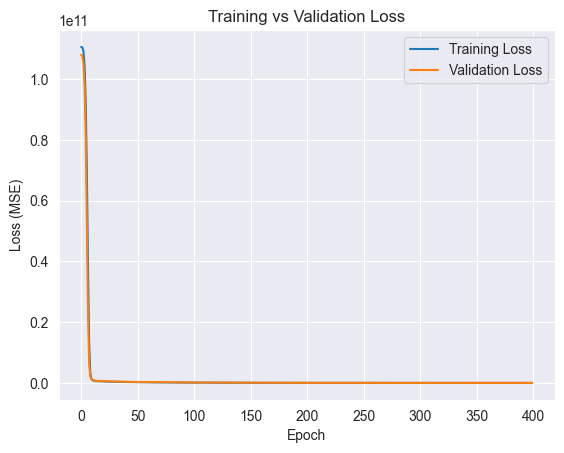

In [67]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [68]:
model.evaluate(X_test_scaled, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10884431.0000 - mae: 2296.5767  


[10884431.0, 2296.57666015625]

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict using the model
y_pred = model.predict(X_test_scaled)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)

print(f"MAE: ₹{mae:.2f}")
print(f"RMSE: ₹{rmse:.2f}")
print(f"R² Score: {r2:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
MAE: ₹2296.58
RMSE: ₹3299.16
R² Score: 1.00


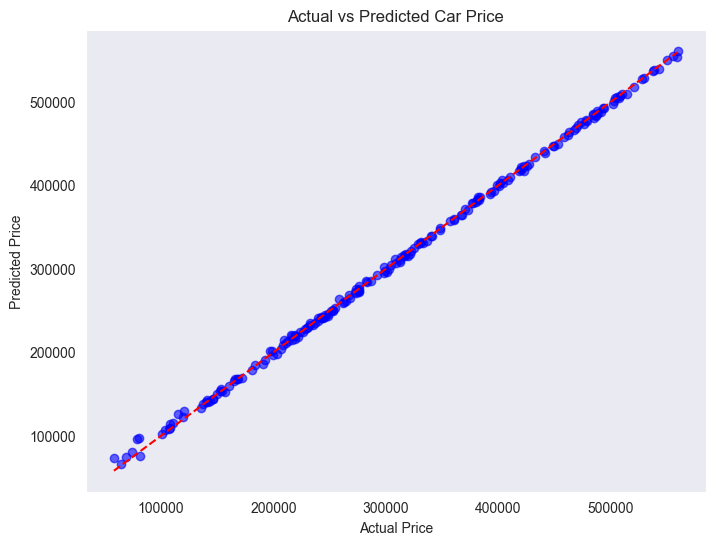

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.grid()
plt.show()


# save model

In [71]:
model.save("car_price_model.h5")

In [72]:
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [73]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']